<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Análisis de Componentes Principales - PCA**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Carlos Jiménez
- Fabian Yepes

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 21 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para "Inversiones Inmobiliarias S.A."** 🏢

**El Escenario:**

Acaban de ser contratados como analistas de datos en **"Inversiones Inmobiliarias S.A."**, una firma líder en el sector de bienes raíces en la región. La firma está buscando expandir sus operaciones, pero se enfrenta a un desafío común: el mercado inmobiliario es complejo y está influenciado por una multitud de factores.

**El Problema:**

El equipo de valoración de propiedades actualmente utiliza modelos basados principalmente en metros cuadrados y número de habitaciones. Sin embargo, saben que factores como la **ubicación** (proximidad a parques, hospitales, transporte), la **seguridad** (tasa de criminalidad) y las **características intrínsecas** de la propiedad (baños, tamaño) interactúan de formas complejas. Tienen muchos datos (`houses.csv`), pero les cuesta extraer una visión clara y concisa de qué define realmente el "atractivo" de una propiedad más allá de lo obvio. Comparar propiedades con perfiles multidimensionales diferentes es difícil y propenso a errores.

**Su Misión (como consultores):**

La dirección les ha encargado aplicar técnicas avanzadas de *machine learning* para abordar este problema. Específicamente, quieren que utilicen el **Análisis de Componentes Principales (PCA)** para:

1.  **Reducir la Complejidad:** Tomar las múltiples características de las propiedades y destilarlas en un número menor de "factores" o "índices" clave que capturen la esencia de lo que impulsa el valor.
2.  **Crear Índices Interpretables:** No basta con reducir dimensiones; deben poder explicar qué significan estos nuevos índices en términos de negocio (ej. "Índice de Tamaño y Comodidades", "Índice de Calidad de Ubicación").

**Su Entregable:**

Deberán completar este Jupyter Notebook, realizando el análisis de PCA sobre el dataset `houses.csv`, interpretando los componentes principales y creando las visualizaciones solicitadas. Sus conclusiones serán presentadas al comité de inversiones para ayudarles a tomar decisiones más informadas.

# 1. Importa las librerías necesarias

In [ ]:
### TU CÓDIGO AQUÍ ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

### Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 Carga el dataset "houses.csv" que se encuentra en el repositorio del curso, carpeta "datasets" y muestra las primeras 5 filas.

In [ ]:
### TU CÓDIGO AQUÍ ###
### TU CÓDIGO AQUÍ ###
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/datasets"

# Establecer el directorio
os.chdir(path)

# Leer el archivo CSV
df_houses = pd.read_csv('houses.csv')
df_houses

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Region,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price
0,0,South,1,1,53,592,2436,2663,963,High,550353
1,1,East,3,2,70,640,652,2532,510,High,780430
2,2,North,2,2,79,1831,1485,7837,586,Medium,455771
3,3,West,6,5,189,255,974,2523,1152,Low,766631
4,4,West,7,6,199,1602,584,9690,615,Medium,757092
...,...,...,...,...,...,...,...,...,...,...,...
995,995,East,3,4,110,983,983,2888,1249,Medium,592691
996,996,West,7,6,225,775,1734,9245,1667,Medium,545534
997,997,West,6,4,161,941,1737,4234,439,High,650564
998,998,South,2,2,57,763,2663,7232,1587,Medium,452658


# 3. Análisis Exploratorio y Preprocesamiento de Datos

PCA tiene dos requisitos fundamentales:
1.  **Solo funciona con variables numéricas.**
2.  **Es muy sensible a la escala de las variables.**

Por lo tanto, nuestro trabajo en esta sección es: identificar las variables relevantes, convertirlas a un formato numérico y estandarizarlas.

## 3.1. Revisa si hay valores nulos y muestra el tipo de dato de cada una de las columnas

In [ ]:
### TU CÓDIGO AQUÍ ###

# Valores Nulos
print(df_houses.isna().sum())

# Tipo de dato
df_houses.info()

Id                     0
Region                 0
Bedrooms               0
Bathrooms              0
Square_Meters          0
Dist_to_Park           0
Dist_to_Hospital       0
Dist_to_Underground    0
Dist_to_School         0
Crime_Rate             0
Price                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   object
 10  Price        

## 3.2. Codifica las Variables Categóricas Region y Crime_Rate

* **Region:** Es una variable nominal (no hay un orden inherente). Por tanto, usa **One-Hot Encoding**. Incluye en el código drop_first=True y dtype=int.
* **Crime_Rate:** Es una variable ordinal (Low < Medium < High). Por tanto, dale un valor numérico según este diccionario: mapping = {'High': 3, 'Medium': 2, 'Low': 1}

In [ ]:
### TU CÓDIGO AQUÍ ###
# One-Hot Encoding para Region
region_dummy = pd.get_dummies(df_houses["Region"], prefix='Region', drop_first=True, dtype=int)
df_houses = pd.concat([df_houses, region_dummy], axis=1)
df_houses = df_houses.drop("Region", axis=1)

# Ordinal Encoding for 'Crime_Rate'
mapping = {'High': 3, 'Medium': 2, 'Low': 1}
df_houses['Crime_Rate_Encoded'] = df_houses['Crime_Rate'].map(mapping)

In [ ]:
df_houses

,Id,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price,Region_North,Region_South,Region_West,Crime_Rate_Encoded
0,0,1,1,53,592,2436,2663,963,High,550353,0,1,0,3
1,1,3,2,70,640,652,2532,510,High,780430,0,0,0,3
2,2,2,2,79,1831,1485,7837,586,Medium,455771,1,0,0,2
3,3,6,5,189,255,974,2523,1152,Low,766631,0,0,1,1
4,4,7,6,199,1602,584,9690,615,Medium,757092,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,3,4,110,983,983,2888,1249,Medium,592691,0,0,0,2
996,996,7,6,225,775,1734,9245,1667,Medium,545534,0,0,1,2
997,997,6,4,161,941,1737,4234,439,High,650564,0,0,1,3
998,998,2,2,57,763,2663,7232,1587,Medium,452658,0,1,0,2


## 3.3. Selección y Estandarización de Variables

Ahora seleccionaremos todas las variables predictoras (features) y las estandarizaremos. La estandarización (dejar cada variable con media 0 y desviación estándar 1) es **crucial**. Si no lo hiciéramos, la variable con la mayor escala (por ejemplo, `Square_Meters`) dominaría el análisis de PCA, ya que PCA busca maximizar la varianza.

In [ ]:
# Seleccionamos las columnas que usaremos para PCA
# Excluimos el ID, las categóricas originales y el precio (nuestra variable respuesta)
features = ['Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park',
            'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School',
            'Crime_Rate_Encoded', 'Region_North', 'Region_South', 'Region_West']

X = df_houses[features]
y = df_houses['Price']

Estandariza las variables que se encuentran en X. Llama al nuevo objeto X_scaled.

In [ ]:
### TU CÓDIGO AQUÍ ###

scaler_houses = StandardScaler()
X_scaled = scaler_houses.fit_transform(X)
print('Dimensiones de los datos estandarizados:', X_scaled.shape)

Dimensiones de los datos estandarizados: (1000, 11)


## 3.4. Grafica un mapa de calor para ver las correlaciones entre las variables predictoras (features).

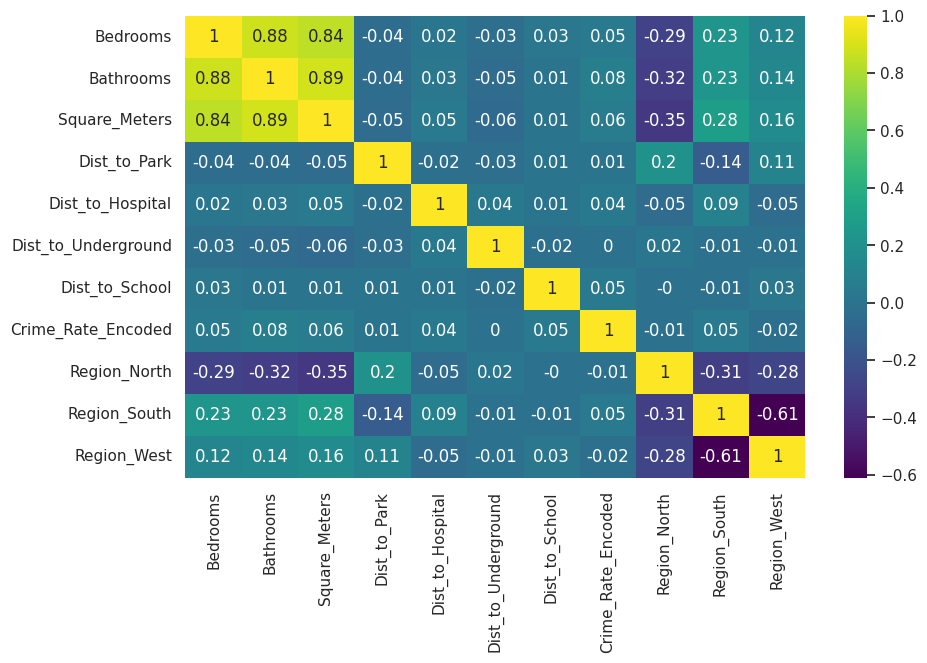

In [ ]:
### TU CÓDIGO AQUÍ ###
corr = X.corr().round(2)
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

## 3.5. Escribe un análisis sobre las correlaciones observadas. Haz énfasis en las correlaciones más altas (positivas o negativas).

El mapa de calor muestra una fuerte correlación positiva entre Bedrooms, Bathrooms y Square_Meters (superiores a 0.8), lo que indica que las viviendas con más habitaciones tienden a tener más baños y mayor área. Las variables de distancia presentan correlaciones muy bajas con el resto, sugiriendo poca relación lineal con las características del tamaño o la ubicación. En cuanto a las regiones, se observan correlaciones negativas moderadas entre Region_North y las variables de tamaño, mientras que Region_South y Region_West presentan una correlación negativa alta (−0.61), lo cual refleja la exclusividad entre categorías regionales

# 4. Aplicando el Análisis de Componentes Principales (PCA)

Con los datos limpios y estandarizados, es hora de aplicar PCA. Nuestro objetivo es determinar cuántos componentes principales necesitamos para capturar una cantidad significativa de la "información" (varianza) de nuestros datos originales.

## 4.1. Instancia PCA. No especifiques n_components para calcularlos todos. Ajusta PCA a los datos escalados.

In [ ]:
### TU CÓDIGO AQUÍ ###
pca_houses = PCA()
pca_houses.fit(X_scaled)

PCA()

## 4.2. Varianza Explicada

El aspecto más importante de PCA es la **varianza explicada**. Cada componente principal explica un porcentaje de la varianza total de los datos. El primer componente siempre explica la mayor parte, el segundo un poco menos, y así sucesivamente.

Grafica la varianza explicada acumulada para decidir cuántos componentes son suficientes.

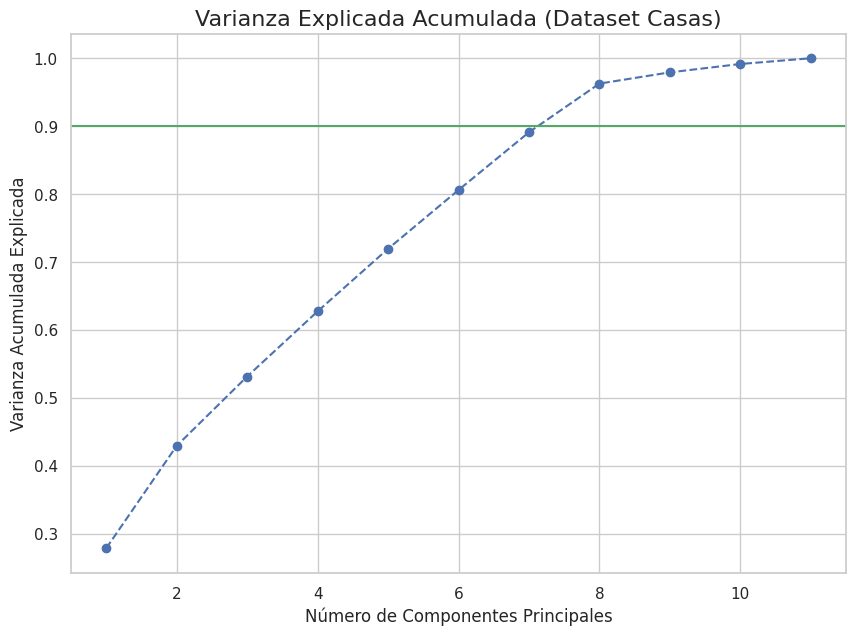

In [ ]:
### TU CÓDIGO AQUÍ ###
varianza_acumulada_houses = np.cumsum(pca_houses.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(varianza_acumulada_houses) + 1), varianza_acumulada_houses, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada (Dataset Casas)', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Acumulada Explicada', fontsize=12)
plt.axhline(y=0.9, color='g', linestyle='-', label='90% de Varianza')
plt.show()

Este gráfico es nuestra herramienta de decisión. Nos muestra el **trade-off entre simplicidad e información**.
- Si queremos el modelo más simple posible, podríamos usar 2 o 3 componentes, pero solo explicaríamos 40-50% de la variabilidad en los datos (perderíamos mucha información).
- Una regla común en la industria es mantener suficientes componentes para explicar entre el 90% y el 95% de la varianza.

## 4.3. ¿Con cuántos componentes se captura el 90% de la información contenida en nuestras 11 variables originales?
Se captura el 90% con 7 componentes.

# 5. Re-aplicando PCA indicando el Número de Componentes Deseados

Corre PCA de nuevo, pero esta vez especificando que queremos quedarnos con 4 componentes.

In [ ]:
### TU CÓDIGO AQUÍ ###
pca_houses_4 = PCA(n_components=4)
X_scaled_pca = pca_houses_4.fit_transform(X_scaled)

print("Dimensiones del dataset original:", X_scaled.shape)
print("Dimensiones del dataset reducido:", X_scaled_pca.shape)

Dimensiones del dataset original: (1000, 11)
Dimensiones del dataset reducido: (1000, 4)


Hemos reducido las dimensiones, pero ¿qué significan estas nuevas 4 variables? Para un economista, esta es la parte más importante. Debemos "bautizar" a nuestros componentes entendiendo qué variables originales los componen.

Esto lo hacemos analizando los **loadings** (cargas o pesos) de cada variable original en cada componente.

## 5.1. Grafica el mapa de calor de los loadings

In [ ]:
### TU CÓDIGO AQUÍ ###
df_houses_loadings = pd.DataFrame(pca_houses_4.components_,
                                columns=X.columns,
                                index=['CP1', 'CP2', "CP3", "CP4"])
df_houses_loadings

,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate_Encoded,Region_North,Region_South,Region_West
CP1,0.52,0.54,0.53,-0.07,0.04,-0.04,0.01,0.05,-0.30,0.22,0.08
CP2,0.07,0.07,0.06,0.24,-0.14,-0.04,0.05,-0.05,-0.01,-0.64,0.70
CP3,0.14,0.14,0.10,0.62,-0.05,-0.20,0.19,0.34,0.55,0.01,-0.26
CP4,-0.06,-0.05,-0.05,-0.06,0.55,0.38,0.47,0.53,-0.13,-0.05,0.13


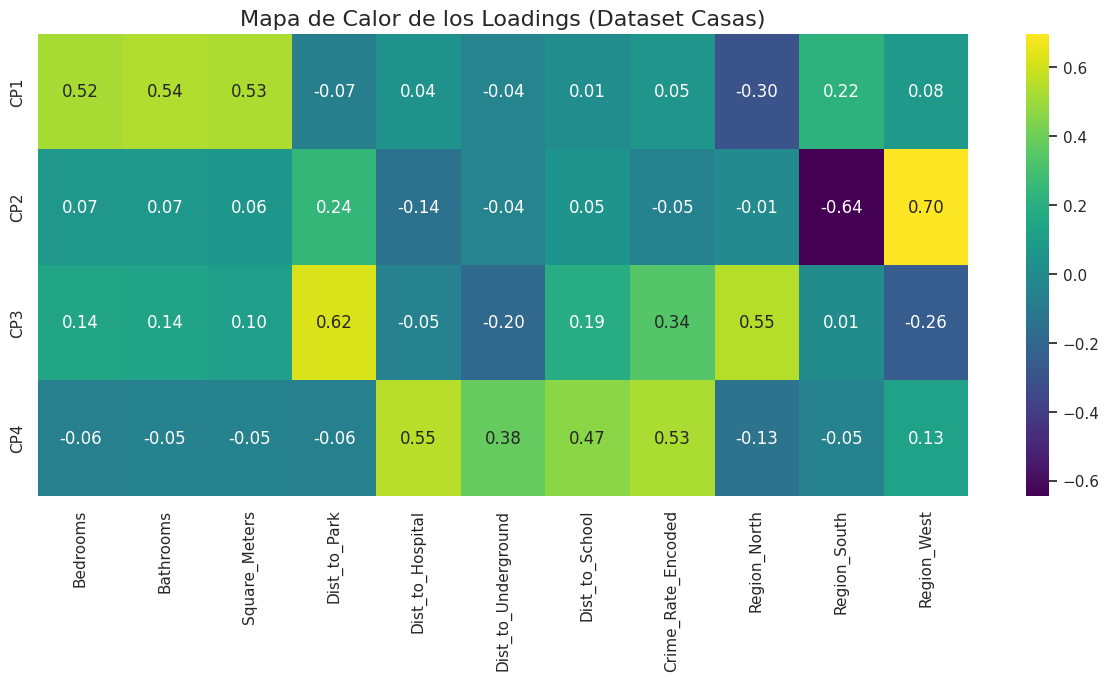

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_houses_loadings, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mapa de Calor de los Loadings (Dataset Casas)', fontsize=16)
plt.show()

## 5.2. Realiza una interpretación de los componentes. ¿Cuáles variables tienen las cargas altas y positivas y cuáles las cargas altas y negativas? De acuerdo con este análisis, ¿qué nombre le darías a cada componente?

Se uso el suspuesto de que todas las correlaciónes en valor absoluto mayor o igual al 0.50 es considerado relevante y una carga alta, en este caso CP1 tiene una alta correlación positiva con las variables de los baños , habitaciones y metros cuadrados. Por otro lado CP2 tiene una alta correlación positiva con la ubicación hacia el este , una alta correlación negativa con la variable de ubicación hacia el sur. CP3 tiene una alta correlación positiva con las variables de ubicación que queda cerca al parque y hacia el norte y por ultimo CP4 tiene una alta correlación positiva con las variables de ubicación que queda cerca al hospital y zonas de alta incidencia de crime . anera. A cada componente lo nombramos de la siguiente maner CP1 : " Viviendas de lujo dada la cantidad de habitaciones y metros cuadrados. CP2 : " Casas de invierno ó campestres debido a las variables de ubicación en USA , donde esta zona es una de las más frias. CP3 : " Apartamentos dada su ubicación que se encuentran en conglomeraciones. CP4 : " Zonas de riesgo debido a su alta incidencia en crimen y con alta cantidad de hospitales"